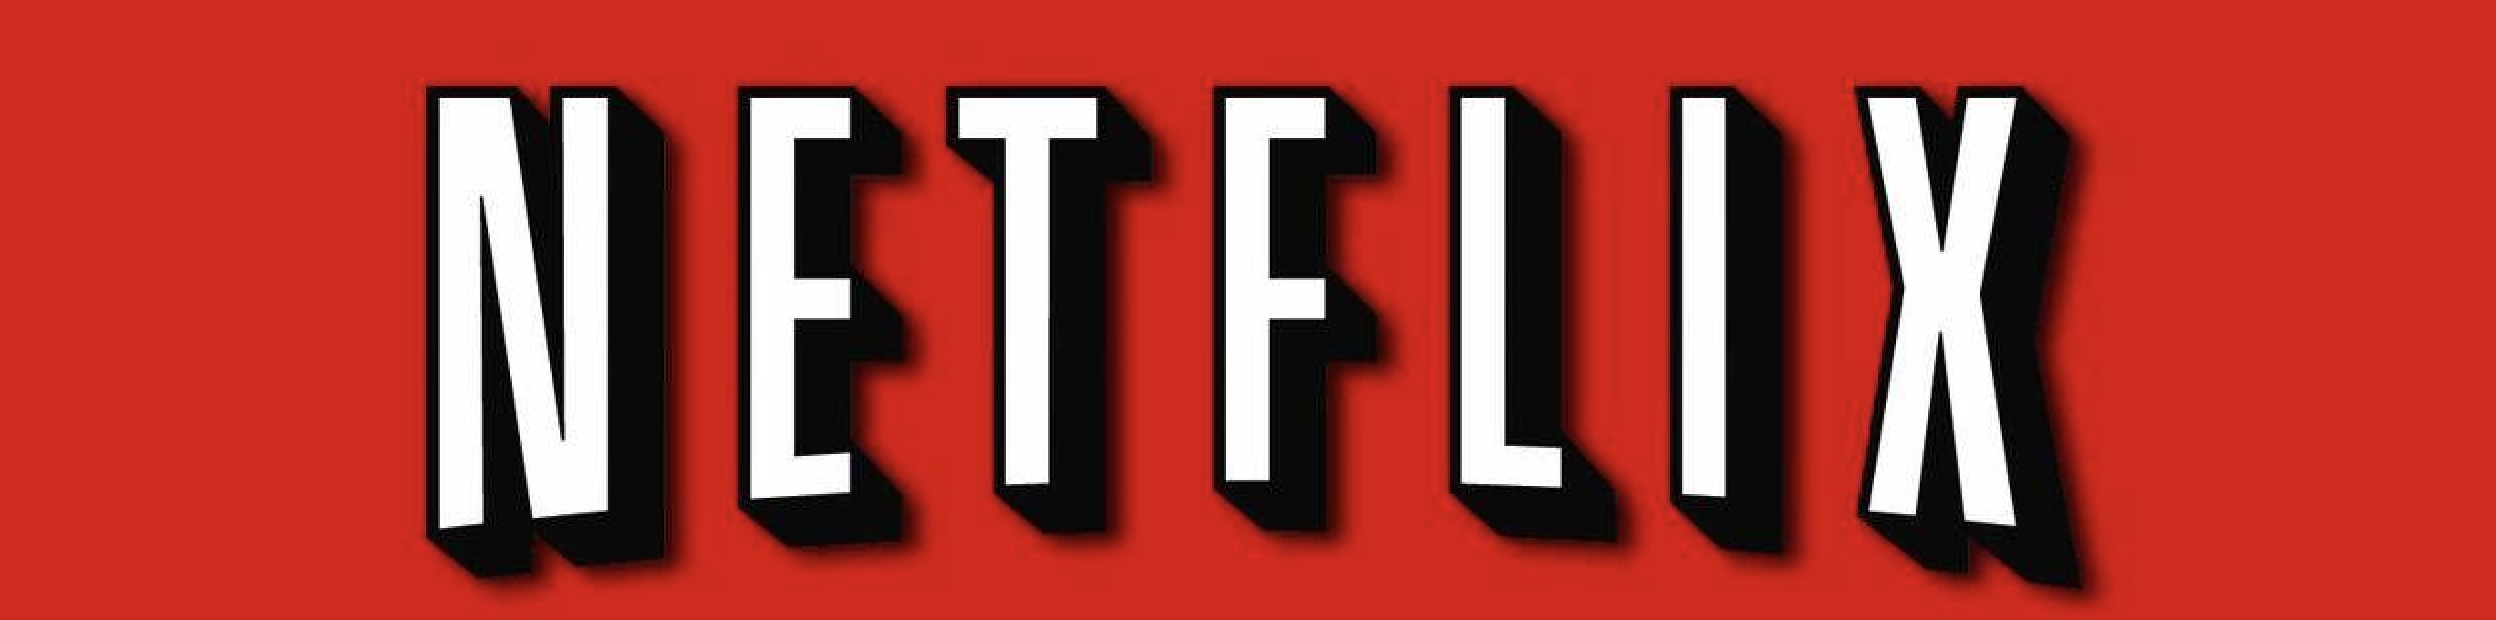

In [1]:
#Required Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")


# 1. Data preview
## 1.1 Raw Data

In [2]:
df = pd.read_csv("/kaggle/input/netflix-data/netflix.csv")
df.rename({"listed_in":"genre"},axis=1,inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 1.2 OverView

In [3]:
#Shape of the data, no. of rows & no. of columns
#information 
print("shape of the dataset is: ",df.shape)
print()
print("-----------------------------------------------")
print(df.info())

shape of the dataset is:  (8807, 12)

-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  genre         8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [4]:
#number of unique values in data
for i in df.columns:
    #print(i)
    print(f"{i} : {df[i].nunique()}")

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
genre : 514
description : 8775


In [5]:
miss_val = df.isna().sum()
percent_missing = round(((miss_val)/len(df)*100),2)

miss_val_df = pd.DataFrame({"missing_val_count":miss_val,"missing_val_%":percent_missing})
miss_val_df

,missing_val_count,missing_val_%
show_id,0,0.00
type,0,0.00
title,0,0.00
director,2634,29.91
cast,825,9.37
country,831,9.44
date_added,10,0.11
release_year,0,0.00
rating,4,0.05
duration,3,0.03


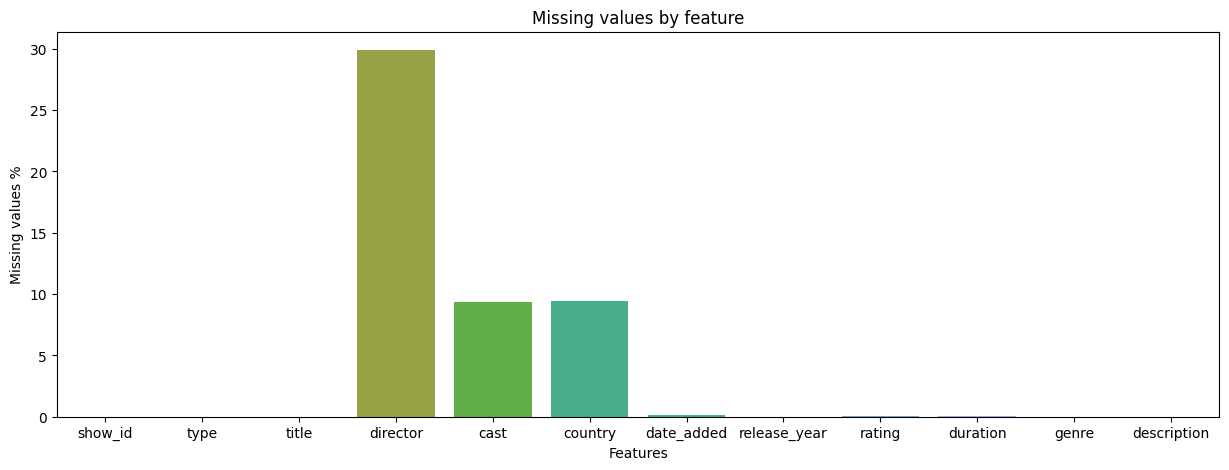

In [6]:
plt.figure(figsize=(15,5))
plt.title("Missing values by feature")
sns.barplot(data = miss_val_df, x = miss_val_df.index, y = miss_val_df["missing_val_%"])
plt.xlabel("Features")
plt.ylabel("Missing values %")

plt.show()

In [7]:
#Checking the occurences of each of the ratings
df["rating"].value_counts()

#3 Misplaced values from the "duration" column [74 , 84, 66] min  

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

## 1.3 Raw Data Flaws

* Misplaced "duration" values from the rating column
* Nested Values
* Missing Values
* DateTime format
* "duration" units (minutes,seasons)



----------------------------------------------------------------------------------------

In [8]:
#we would not be required description lets drop 

df.drop("description",axis=1,inplace=True)

# 2. Data Pre-Processing

## 2.1 Handling misplaced values from rating to duration.


In [9]:
dur_mask = df[df["rating"].str.endswith("min",na=False)]   #na = False ignore null values
dur_mask

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies


In [10]:
# Swapping the values
df.loc[dur_mask.index, "duration"] = df.loc[dur_mask.index,"rating"] 

df.loc[dur_mask.index,"rating"] = np.nan

df["rating"].value_counts() # rearrangement done.

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

## 2.2 Handling Nested Values

In [11]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas"


Nested Features are -->   "director" , "cast", "genre" , "country"

In [12]:
# #unnesting the directors column,

# dir_lis = df["director"].apply(lambda x:str(x).split(", ")).tolist()
# dir_df = pd.DataFrame(dir_lis,index=df["show_id"])
# dir_df = dir_df.stack()
# dir_df = pd.DataFrame(dir_df.reset_index())
# dir_df.rename(columns={0:"Directors"},inplace=True)
# dir_df.drop(["level_1"],axis=1,inplace=True)
# dir_df.head

In [13]:
#function to unnest the feature

def unnest_features(col_name):
    lis = df[col_name].apply(lambda x:str(x).split(", ")).tolist()
    dir_df = pd.DataFrame(lis,index=df["show_id"])
    dir_df = dir_df.stack()
    dir_df = pd.DataFrame(dir_df.reset_index())
    dir_df.rename(columns={0:col_name},inplace=True)
    dir_df.drop(["level_1"],axis=1,inplace=True)
    
    dir_df[col_name] = dir_df[col_name].replace("nan",np.nan)
    
    return dir_df

In [14]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [15]:
dir_df = unnest_features("director")
dir_df 

,show_id,director
0,s1,Kirsten Johnson
1,s2,NaN
2,s3,Julien Leclercq
3,s4,NaN
4,s5,NaN
...,...,...
9607,s8803,David Fincher
9608,s8804,NaN
9609,s8805,Ruben Fleischer
9610,s8806,Peter Hewitt


In [16]:
cast_df = unnest_features("cast")
cast_df 

,show_id,cast
0,s1,NaN
1,s2,Ama Qamata
2,s2,Khosi Ngema
3,s2,Gail Mabalane
4,s2,Thabang Molaba
...,...,...
64946,s8807,Manish Chaudhary
64947,s8807,Meghna Malik
64948,s8807,Malkeet Rauni
64949,s8807,Anita Shabdish


In [17]:
genre_df = unnest_features("genre")
genre_df 

,show_id,genre
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows
...,...,...
19318,s8806,Children & Family Movies
19319,s8806,Comedies
19320,s8807,Dramas
19321,s8807,International Movies


In [18]:
country_df = unnest_features("country")
country_df 

,show_id,country
0,s1,United States
1,s2,South Africa
2,s3,NaN
3,s4,NaN
4,s5,India
...,...,...
10840,s8803,United States
10841,s8804,NaN
10842,s8805,United States
10843,s8806,United States


In [19]:
#merge all these unnested features 

m_df1 = dir_df.merge(cast_df,on="show_id",how="inner")
m_df2 = m_df1.merge(genre_df,on="show_id",how="inner")
m_df3 = m_df2.merge(country_df,on="show_id",how="inner")

#Except show_id, rename other columns to merge with the main df

m_df3= m_df3.rename({"director":"Director","cast":"Cast","genre":"Genre","country":"Country"},axis=1)

m_df3

,show_id,Director,Cast,Genre,Country
0,s1,Kirsten Johnson,NaN,Documentaries,United States
1,s2,NaN,Ama Qamata,International TV Shows,South Africa
2,s2,NaN,Ama Qamata,TV Dramas,South Africa
3,s2,NaN,Ama Qamata,TV Mysteries,South Africa
4,s2,NaN,Khosi Ngema,International TV Shows,South Africa
...,...,...,...,...,...
201986,s8807,Mozez Singh,Anita Shabdish,International Movies,India
201987,s8807,Mozez Singh,Anita Shabdish,Music & Musicals,India
201988,s8807,Mozez Singh,Chittaranjan Tripathy,Dramas,India
201989,s8807,Mozez Singh,Chittaranjan Tripathy,International Movies,India


In [20]:
df = df.merge(m_df3,on="show_id",how="inner")
df.drop(columns=["director","cast","country","genre"],inplace=True)
df.head(10)

,show_id,type,title,date_added,release_year,rating,duration,Director,Cast,Genre,Country
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,Kirsten Johnson,NaN,Documentaries,United States
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,NaN,Ama Qamata,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,NaN,Ama Qamata,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,NaN,Ama Qamata,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,NaN,Khosi Ngema,International TV Shows,South Africa
5,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,NaN,Khosi Ngema,TV Dramas,South Africa
6,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,NaN,Khosi Ngema,TV Mysteries,South Africa
7,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,NaN,Gail Mabalane,International TV Shows,South Africa
8,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,NaN,Gail Mabalane,TV Dramas,South Africa
9,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,NaN,Gail Mabalane,TV Mysteries,South Africa


In [21]:
df.isna().sum()

show_id             0
type                0
title               0
date_added        158
release_year        0
rating             70
duration            0
Director        50643
Cast             2146
Genre               0
Country         11897
dtype: int64

## 2.3 Handling Missing Values (Imputation)


Features with Nan values --> "date_added","rating","Director","Cast","Country"


Date_added Imputation

In [22]:
# Impute the 'date_added' column based on the 'release_year'.
# For each unique release year, the mode of 'date_added' is calculated,
# and this mode value is used to fill in any missing values in 'date_added'.


for i in df[df["date_added"].isnull()]["release_year"].unique():
    #print(f"Year: {i}")
    inp = df[df["release_year"]==i]["date_added"].mode().values[0]
    df.loc[df["release_year"]==i,"date_added"] = df.loc[df["release_year"]==i,"date_added"].fillna(inp)
    


Director & Cast Imputation

In [23]:
df["Director"] =df["Director"].fillna("Unknown Director")
df["Cast"] = df["Cast"].fillna("Unknown Actor")

Rating Imputation

In [24]:
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])

In [25]:
df.head()

,show_id,type,title,date_added,release_year,rating,duration,Director,Cast,Genre,Country
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,Kirsten Johnson,Unknown Actor,Documentaries,United States
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Unknown Director,Ama Qamata,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Unknown Director,Ama Qamata,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Unknown Director,Ama Qamata,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Unknown Director,Khosi Ngema,International TV Shows,South Africa


Country Imputation

In [26]:
df['Country'] = df.groupby(['type', 'Genre'])['Country'].transform(lambda x: x.fillna(x.mode()[0]))


## 2.4 Extracting & Converting "duration"


In [27]:
#Removing the extensions "min" & "season"
df["duration"] = df["duration"].str.split()
df["duration"] = df["duration"].apply(lambda a:a[0])
df["duration"] = df["duration"].astype(int)

## 2.5 Handling Date Format

In [28]:
df["date_added"] = df["date_added"].str.strip() # removing white spaces
df["date_added"] = pd.to_datetime(df["date_added"],format="%B %d, %Y")

In [29]:
df.head()

,show_id,type,title,date_added,release_year,rating,duration,Director,Cast,Genre,Country
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,Kirsten Johnson,Unknown Actor,Documentaries,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Unknown Director,Ama Qamata,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Unknown Director,Ama Qamata,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Unknown Director,Ama Qamata,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Unknown Director,Khosi Ngema,International TV Shows,South Africa


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201991 entries, 0 to 201990
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201991 non-null  object        
 1   type          201991 non-null  object        
 2   title         201991 non-null  object        
 3   date_added    201991 non-null  datetime64[ns]
 4   release_year  201991 non-null  int64         
 5   rating        201991 non-null  object        
 6   duration      201991 non-null  int64         
 7   Director      201991 non-null  object        
 8   Cast          201991 non-null  object        
 9   Genre         201991 non-null  object        
 10  Country       201991 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 17.0+ MB


# 3. Data Analysis

## 3.1 Top 10 Genres in Movies / TV shows

In [31]:
movie_df = df[df["type"]=="Movie"]
tv_show_df = df[df["type"]=="TV Show"]

#movie_df
#tv_show_df

In [32]:

mov_df = movie_df.groupby(["Genre"]).agg({"show_id":"nunique"}).sort_values(by="show_id",ascending=False).reset_index()
mov_df = mov_df.rename({"show_id":"count"},axis=1)
mov_df.head(10)

,Genre,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859
5,Independent Movies,756
6,Children & Family Movies,641
7,Romantic Movies,616
8,Thrillers,577
9,Music & Musicals,375


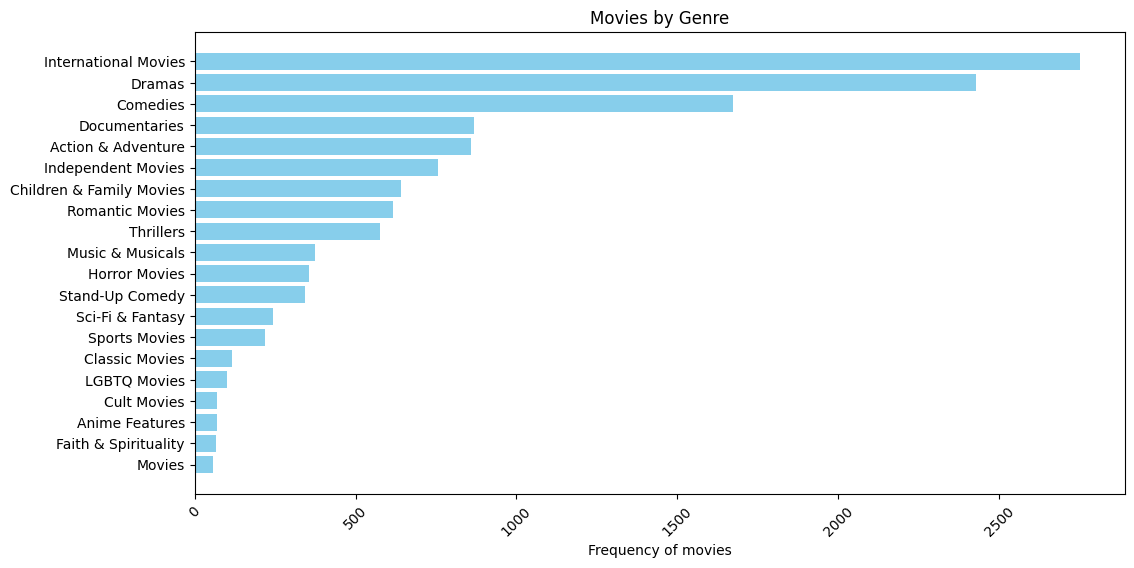

In [33]:
plt.figure(figsize=(12, 6))
plt.barh(mov_df["Genre"], mov_df["count"], color='skyblue')
plt.xlabel('Frequency of movies')
plt.title('Movies by Genre')
plt.gca().invert_yaxis()
plt.xticks(rotation=45)

plt.show()

In [34]:
tv_shw_df = tv_show_df.groupby(["Genre"]).agg({"show_id":"nunique"}).sort_values(by="show_id",ascending=False).reset_index()
tv_shw_df = tv_shw_df.rename({"show_id":"count"},axis=1)
tv_shw_df

,Genre,count
0,International TV Shows,1351
1,TV Dramas,763
2,TV Comedies,581
3,Crime TV Shows,470
4,Kids' TV,451
5,Docuseries,395
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,253
9,Anime Series,176


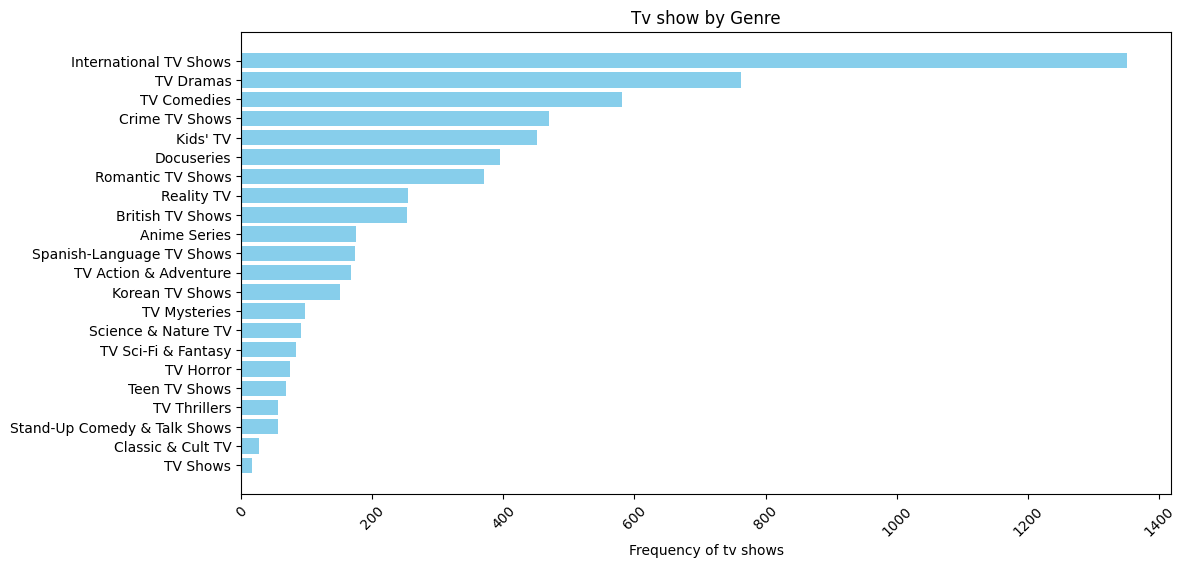

In [35]:
plt.figure(figsize=(12, 6))
plt.barh(tv_shw_df["Genre"], tv_shw_df["count"], color='skyblue')
plt.xlabel('Frequency of tv shows')
plt.title('Tv show by Genre')
plt.gca().invert_yaxis()
plt.xticks(rotation=45)

plt.show()

Insight: Best Performing Genre's are Internation TV shows, Dramas , Comedies.

## 3.2 Distribution of Movies & Tv shows

In [36]:
df.groupby(["type"]).agg({"show_id":"nunique"})

,show_id
type,
Movie,6131
TV Show,2676


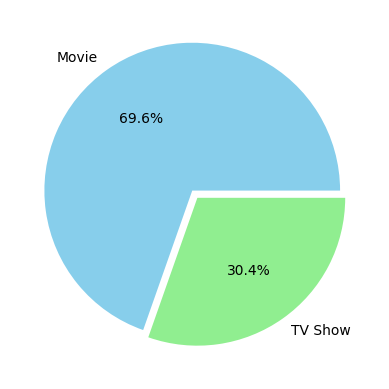

In [37]:
pie_df = df.groupby(["type"]).agg({"show_id":"nunique"}).reset_index()

plt.pie(pie_df["show_id"],explode=(0.03,0.03),labels=pie_df["type"],colors=['skyblue', 'lightgreen'],autopct='%1.1f%%')
plt.show()

Insight: 
The majority of Netflix content consists of movies (6131), with fewer TV shows (2676). 



## 3.3 Content Released on Netflix Over Time

In [38]:
df["year"] = df["date_added"].dt.year
df["month"] = df["date_added"].dt.month
df["week"] = df["date_added"].dt.strftime("%U")

In [39]:
year_df = df.groupby(["year"]).agg({"show_id":"count"}).reset_index()
year_df

,year,show_id
0,2008,19
1,2009,30
2,2010,20
3,2011,438
4,2012,36
5,2013,207
6,2014,450
7,2015,1560
8,2016,8614
9,2017,25233


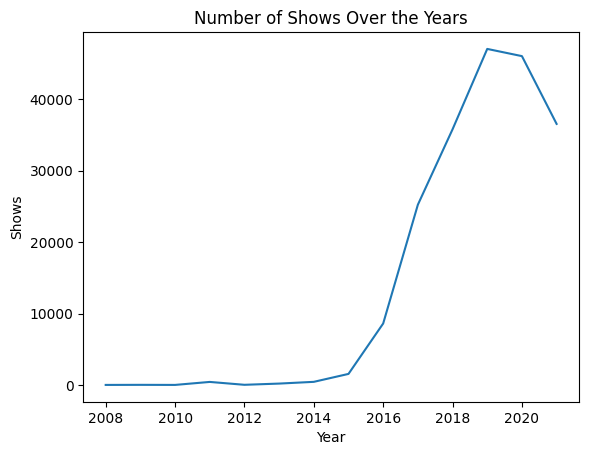

In [40]:
sns.lineplot(data=year_df, x='year', y='show_id')
plt.title('Number of Shows Over the Years')
plt.xlabel('Year')
plt.ylabel('Shows')
plt.show()

In [41]:
df_ye = df.groupby(by=["type","year"]).size().reset_index(name = "count")
df_ye

,type,year,count
0,Movie,2008,18
1,Movie,2009,30
2,Movie,2010,20
3,Movie,2011,438
4,Movie,2012,36
5,Movie,2013,75
6,Movie,2014,343
7,Movie,2015,1125
8,Movie,2016,4858
9,Movie,2017,18252


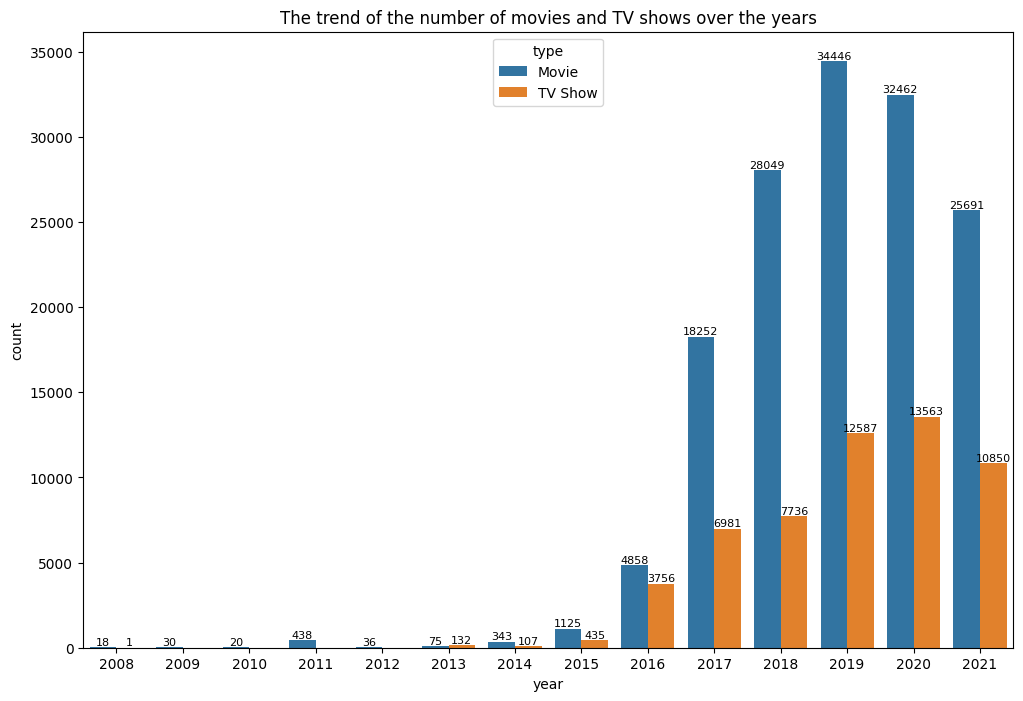

In [42]:
plt.figure(figsize=(12,8))
plt.title("The trend of the number of movies and TV shows over the years")
plt.xlabel("Year")
plt.ylabel("Count")

ax = sns.barplot(df_ye,x="year",y="count",hue="type")

for container in ax.containers:
  ax.bar_label(container,fontsize=8)

plt.show()

Insight: 
Data shows a decline in Movie and TV show releases over the past two years.



In [43]:
df_m = df.groupby(by=["type","month"]).size().reset_index(name = "count")
df_m

,type,month,count
0,Movie,1,13947
1,Movie,2,9137
2,Movie,3,11489
3,Movie,4,12538
4,Movie,5,9579
5,Movie,6,11616
6,Movie,7,15049
7,Movie,8,11924
8,Movie,9,13219
9,Movie,10,13514


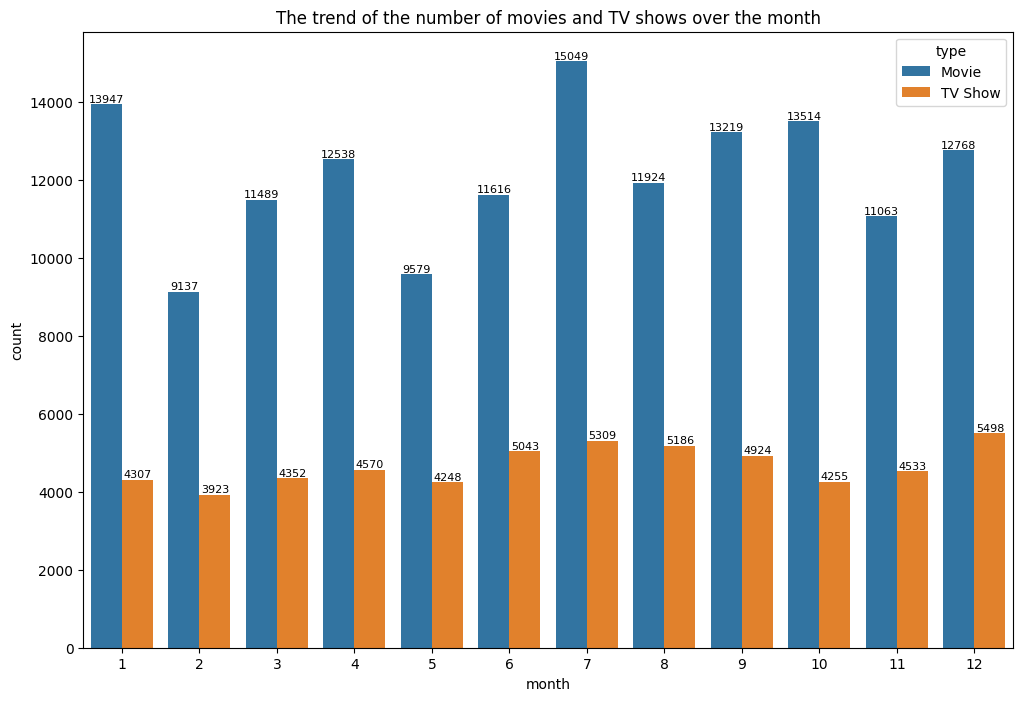

In [44]:
plt.figure(figsize=(12,8))
plt.title("The trend of the number of movies and TV shows over the month")
plt.xlabel("Month")
plt.ylabel("Count")

ax = sns.barplot(df_m,x="month",y="count",hue="type")

for container in ax.containers:
  ax.bar_label(container,fontsize=8)

plt.show()

In [45]:
df_w = df[["show_id","year","week"]].drop_duplicates()
df_w = df_w.groupby("week")["show_id"].size().reset_index(name = "count")
df_w = df_w.sort_values("count",ascending=False)
df_w.head(10)

,week,count
39,39,335
26,26,322
0,00,318
13,13,314
35,35,270
43,43,252
17,17,245
22,22,242
8,08,232
31,31,212


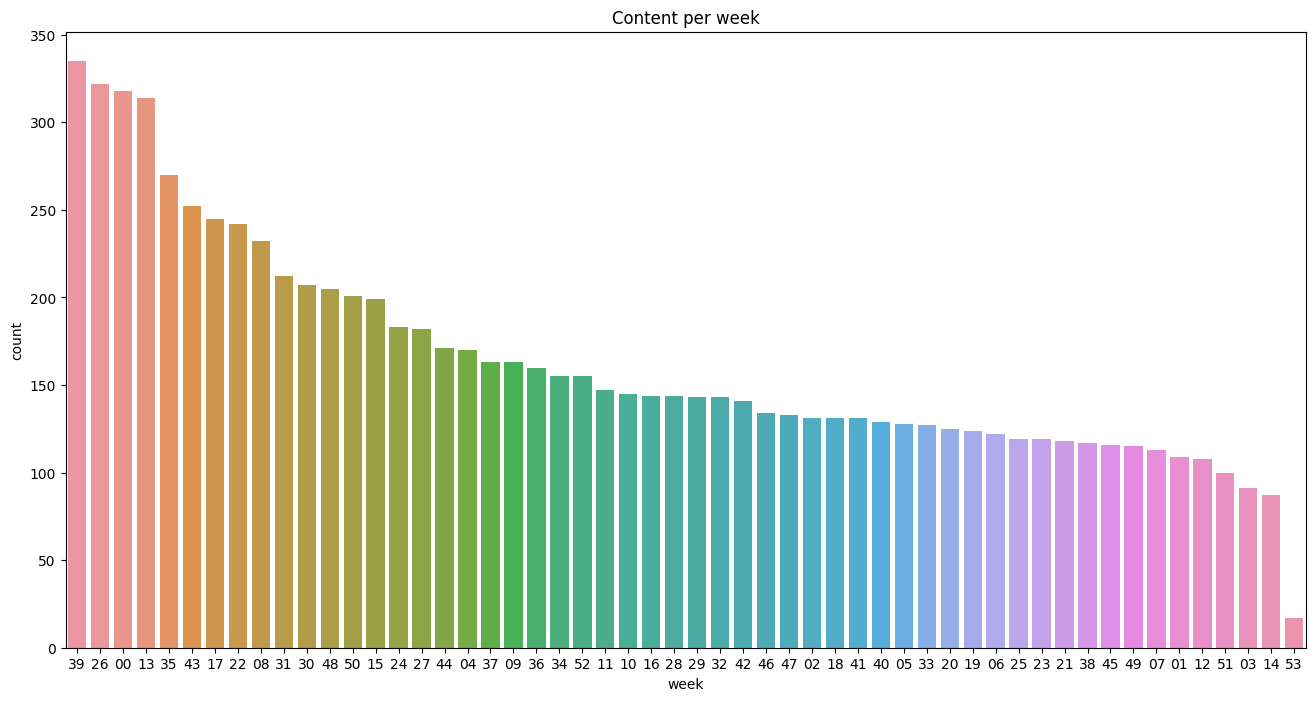

In [46]:
plt.figure(figsize=(16,8))
plt.title("Content per week")
sns.barplot(df_w, x = "week", y = "count")
plt.show()

Insight: 
A siginificant portion of content is released on september week, June week, New year week. 



In [47]:
df.head()

,show_id,type,title,date_added,release_year,rating,duration,Director,Cast,Genre,Country,year,month,week
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,Kirsten Johnson,Unknown Actor,Documentaries,United States,2021,9,38
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Unknown Director,Ama Qamata,International TV Shows,South Africa,2021,9,38
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Unknown Director,Ama Qamata,TV Dramas,South Africa,2021,9,38
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Unknown Director,Ama Qamata,TV Mysteries,South Africa,2021,9,38
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Unknown Director,Khosi Ngema,International TV Shows,South Africa,2021,9,38


## 3.4 Top Countries with the Most Content Available

In [48]:
c_df = df.groupby(["Country"]).agg({"show_id":"nunique"}).reset_index().rename({"show_id":"count"},axis=1).sort_values("count",ascending=False).reset_index(drop=True)
c_df = c_df.head(10)
c_df

,Country,count
0,United States,4496
1,India,1262
2,United Kingdom,820
3,Japan,560
4,Canada,445
5,France,393
6,South Korea,316
7,Spain,232
8,Germany,226
9,Mexico,198


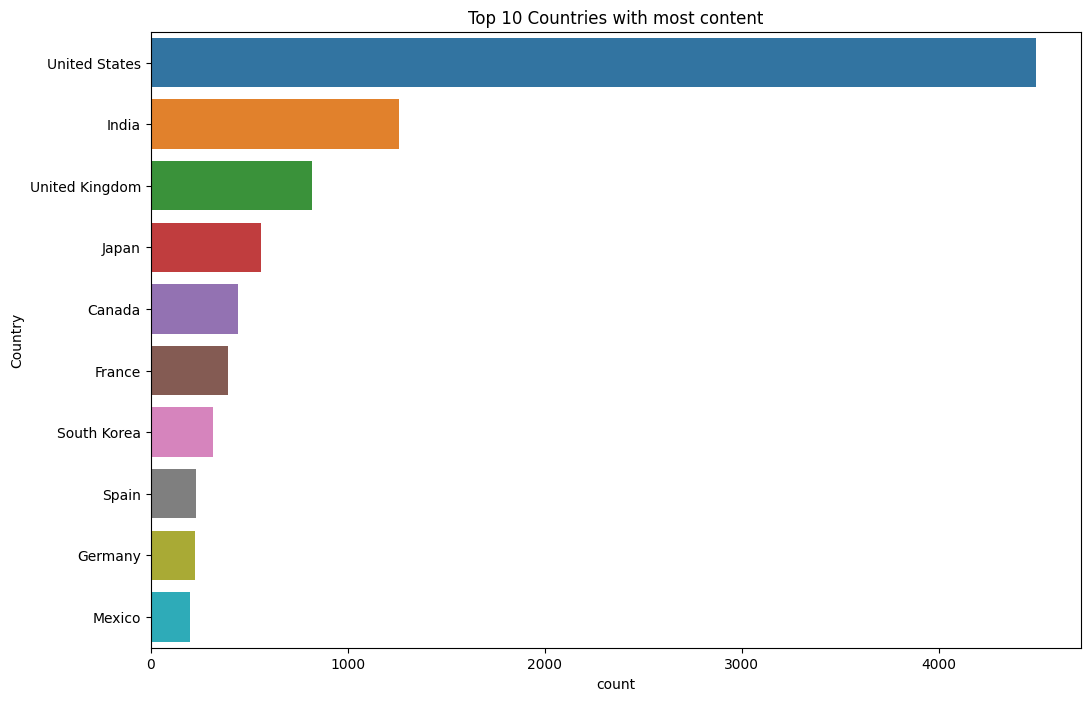

In [49]:
plt.figure(figsize=(12,8))
plt.title("Top 10 Countries with most content")
sns.barplot(c_df,x="count",y="Country")
plt.show()

Insight: The United States leads in content, highlighting the importance as Netflix's primary market.
Followed by India & UK show's significant growth. 


## 3.5 Distribution of Content by Rating

In [50]:
#movie_df
#tv_show_df

In [51]:
movie_df.head()

,show_id,type,title,date_added,release_year,rating,duration,Director,Cast,Genre,Country
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,Kirsten Johnson,Unknown Actor,Documentaries,United States
159,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91,Robert Cullen,Vanessa Hudgens,Children & Family Movies,United States
160,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91,Robert Cullen,Kimiko Glenn,Children & Family Movies,United States
161,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91,Robert Cullen,James Marsden,Children & Family Movies,United States
162,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91,Robert Cullen,Sofia Carson,Children & Family Movies,United States


In [52]:
r_m_df = movie_df.groupby("rating").agg({"show_id":"count"}).sort_values(by = "show_id" , ascending=False).reset_index()
r_m_df

,rating,show_id
0,TV-MA,43973
1,TV-14,29240
2,R,25806
3,PG-13,16246
4,PG,10919
5,TV-PG,10312
6,TV-Y7,2486
7,TV-Y,1878
8,TV-G,1738
9,G,1530


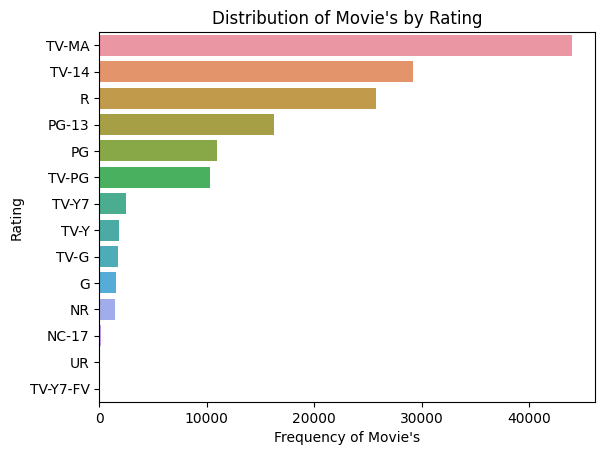

In [53]:
sns.barplot(data = r_m_df , x = "show_id" , y = "rating" )
plt.xlabel("Frequency of Movie's")
plt.ylabel("Rating")
plt.title("Distribution of Movie's by Rating")
plt.show()

In [54]:
r_t_df = tv_show_df.groupby("rating").agg({"show_id":"count"}).sort_values(by="show_id",ascending=False).reset_index()
r_t_df

,rating,show_id
0,TV-MA,29964
1,TV-14,14691
2,TV-PG,4614
3,TV-Y7,3818
4,TV-Y,1787
5,TV-G,1041
6,NR,155
7,R,54
8,TV-Y7-FV,24


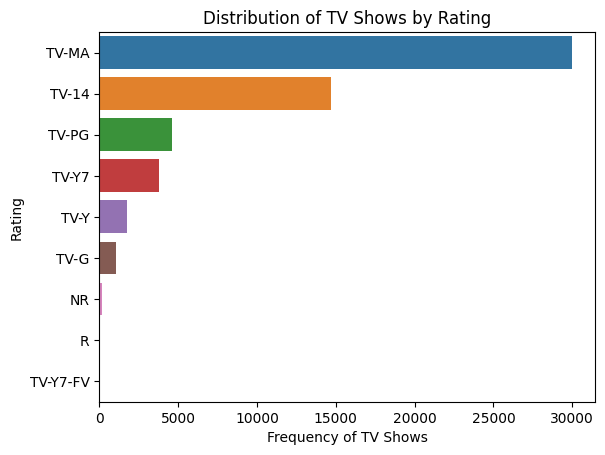

In [55]:
plt.figure()

sns.barplot(data = r_t_df, x = "show_id" , y = "rating")

plt.xlabel("Frequency of TV Shows")  
plt.ylabel("Rating")
plt.title("Distribution of TV Shows by Rating")
plt.show()

Insight: A significant portion of Netflix's content is geared towards mature audiences (TV-MA, TV-14, R), which effectively captures a large adult audience.


## 3.6 Distribution of Content Duration

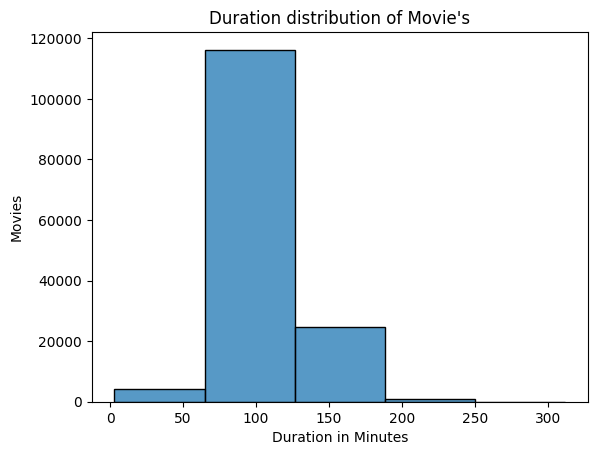

In [56]:
plt.title("Duration distribution of Movie's")
plt.xlabel("Duration in Minutes")
plt.ylabel("Movies")
sns.histplot(data=movie_df["duration"],bins=5)
plt.show()

# movie_df

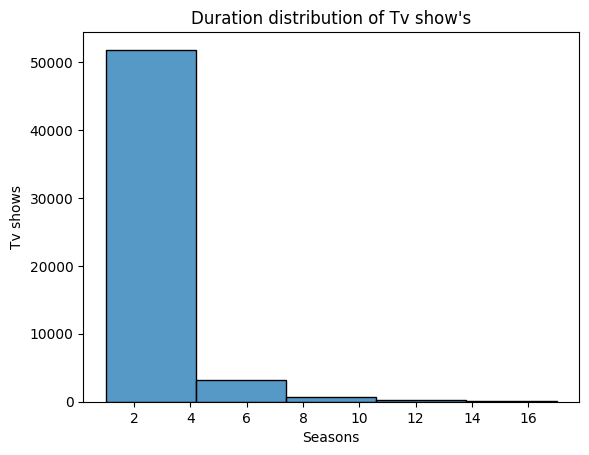

In [57]:
plt.title("Duration distribution of Tv show's")
plt.xlabel("Seasons")
plt.ylabel("Tv shows")
sns.histplot(data=tv_show_df["duration"],bins=5)
plt.show()

# tv_show_df

Insight: The majority of movies have a duration of around 100 minutes, while most TV shows consist of 2 seasons.



## 3.7 Number of Days Until Release on Netflix After a Show/Movie's Initial Release

In [68]:
movie_df['release_date'] = pd.to_datetime(movie_df['release_year'].astype(str) + '-01-01')

# Calculating the number of days between 'date_added' and 'release_date'
movie_df['days_difference'] = (movie_df['date_added'] - movie_df['release_date']).dt.days
calc_m_days = movie_df[movie_df["release_year"]>2015]

calc_m_days['days_difference'] = (calc_m_days['date_added'] - calc_m_days['release_date']).dt.days

da = calc_m_days['days_difference'].mode()[0]

In [69]:
tv_show_df['release_date'] = pd.to_datetime(tv_show_df['release_year'].astype(str) + '-01-01')

# Calculating the number of days between 'date_added' and 'release_date'
tv_show_df['days_difference'] = (tv_show_df['date_added'] - tv_show_df['release_date']).dt.days

di = tv_show_df['days_difference'].mode()[0]

In [71]:
print(f"Movies released on Netflix are available approximately {da} days later from the actual release date.") 
print()
print(f"Tv shows released on Netflix are available approximately {di} days later from the actual release date.")

Movies released on Netflix are available approximately 196 days later from the actual release date.

Tv shows released on Netflix are available approximately 243 days later from the actual release date.


## 3.8 Popular Actor/directors for each country

In [76]:
df.head()


,show_id,type,title,date_added,release_year,rating,duration,Director,Cast,Genre,Country,year,month,week
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,Kirsten Johnson,Unknown Actor,Documentaries,United States,2021,9,38
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Unknown Director,Ama Qamata,International TV Shows,South Africa,2021,9,38
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Unknown Director,Ama Qamata,TV Dramas,South Africa,2021,9,38
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Unknown Director,Ama Qamata,TV Mysteries,South Africa,2021,9,38
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Unknown Director,Khosi Ngema,International TV Shows,South Africa,2021,9,38


In [80]:
popular_actors = df.groupby('Country')['Cast'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
popular_directors = df.groupby('Country')['Director'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)


popular_df = pd.DataFrame({
    'Country': popular_actors.index,
    'Popular Actor': popular_actors,
    'Popular Director': popular_directors
}).reset_index(drop=True)

popular_df

,Country,Popular Actor,Popular Director
0,,Areen Omari,Najwa Najjar
1,Afghanistan,Sohrab Nazari,Pieter-Jan De Pue
2,Albania,Claudio Santamaria,Antonio Morabito
3,Algeria,Abdalla Mahmoud,Youssef Chahine
4,Angola,Cigano Satyohamba,Chris Roland
...,...,...,...
122,Vatican City,Pope Francis,Wim Wenders
123,Venezuela,Unknown Actor,Sebastián Schindel
124,Vietnam,Mai Cat Vi,Victor Vu
125,West Germany,Unknown Actor,Jacek Koprowicz


-----------------------------------------------------------------------------------------------------------------------

# 4. Recommendations
Business Growth at Netflix

* Focus on Region-Specific Genres:

    Tailoring content to fit regional preferences can enhance viewer engagement and attract new subscribers, driving overall business growth.
        
* Invest in Producing More TV Shows:

    TV shows typically engage audiences for longer periods, repeat viewing and encouraging sustained subscriptions. Increased investment in TV production can strengthen viewer loyalty.
        
* Increase Volume of Content Releases:

    Consistently adding new movies and TV shows will keep Netflix competitive in the market and attract new subscribers, ensuring a fresh and engaging platform.

* Strategic Timing for Releases:

    Focus on releasing content festive seasons, when many viewers have holidays.
    
* Expand in Asian and European Markets:

    With a strong presence in the U.S. market, Netflix should concentrate on expanding its reach into Asian and European countries, which offer significant growth potential.

* Diversify Content Offerings:

    Increasing the availability of documentaries, educational series, and localized content can attract a broader audience. Additionally, creating more family-friendly content targeted at younger viewers will enhance engagement.
    
* Timely Releases of Movies and TV Shows:

    Releasing movies and TV shows on Netflix shortly after their original release dates ensures that viewers have access to the latest content, helping to boost viewership.
    
* Consider Popular Actors and Directors:

    When releasing new content, it is essential to consider the popularity of actors and directors in specific regions. Analyzing successful director-actor combinations can lead to more compelling and engaging content.